In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("D:/Youtube/INvideos.csv")
print(df)

          video_id trending_date  \
0      kzwfHumJyYc      17.14.11   
1      zUZ1z7FwLc8      17.14.11   
2      10L1hZ9qa58      17.14.11   
3      N1vE8iiEg64      17.14.11   
4      kJzGH0PVQHQ      17.14.11   
...            ...           ...   
37347  iNHecA3PJCo      18.14.06   
37348  dpPmPbhcslM      18.14.06   
37349  mV6aztP58f8      18.14.06   
37350  qxqDNP1bDEw      18.14.06   
37351  wERgpPK44w0      18.14.06   

                                                   title       channel_title  \
0      Sharry Mann: Cute Munda ( Song Teaser) | Parmi...     Lokdhun Punjabi   
1      पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...             HJ NEWS   
2      Stylish Star Allu Arjun @ ChaySam Wedding Rece...                TFPC   
3                         Eruma Saani | Tamil vs English         Eruma Saani   
4      why Samantha became EMOTIONAL @ Samantha naga ...          Filmylooks   
...                                                  ...                 ...   
37347  

In [3]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [4]:
df.isnull().any()

video_id                  False
trending_date             False
title                     False
channel_title             False
category_id               False
publish_time              False
tags                      False
views                     False
likes                     False
dislikes                  False
comment_count             False
thumbnail_link            False
comments_disabled         False
ratings_disabled          False
video_error_or_removed    False
description                True
dtype: bool

In [5]:
df["description"] = df["description"].fillna(value = "")

In [6]:
df.isnull().any()

video_id                  False
trending_date             False
title                     False
channel_title             False
category_id               False
publish_time              False
tags                      False
views                     False
likes                     False
dislikes                  False
comment_count             False
thumbnail_link            False
comments_disabled         False
ratings_disabled          False
video_error_or_removed    False
description               False
dtype: bool

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37352 entries, 0 to 37351
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                37352 non-null  object
 1   trending_date           37352 non-null  object
 2   title                   37352 non-null  object
 3   channel_title           37352 non-null  object
 4   category_id             37352 non-null  int64 
 5   publish_time            37352 non-null  object
 6   tags                    37352 non-null  object
 7   views                   37352 non-null  int64 
 8   likes                   37352 non-null  int64 
 9   dislikes                37352 non-null  int64 
 10  comment_count           37352 non-null  int64 
 11  thumbnail_link          37352 non-null  object
 12  comments_disabled       37352 non-null  bool  
 13  ratings_disabled        37352 non-null  bool  
 14  video_error_or_removed  37352 non-null  bool  
 15  de

Which year was data collected

In [8]:
cdf = df['trending_date'].apply(lambda x : '20'+x[:2]).value_counts().to_frame().reset_index().rename(columns = {"index":"year", "trending_date":"no_of_videos"})

In [9]:
print(cdf)

  no_of_videos  count
0         2018  28293
1         2017   9059


In [10]:
#what is the percentage of videos released in that particular year

df['trending_date'].apply(lambda x : '20'+x[:2]).value_counts(normalize = True)

trending_date
2018    0.757469
2017    0.242531
Name: proportion, dtype: float64

In [11]:
#description
df.describe()

,category_id,views,likes,dislikes,comment_count
count,37352.000000,3.735200e+04,3.735200e+04,3.735200e+04,37352.00000
mean,21.576596,1.060478e+06,2.708272e+04,1.665082e+03,2676.99743
std,6.556593,3.184932e+06,9.714510e+04,1.607617e+04,14868.31713
min,1.000000,4.024000e+03,0.000000e+00,0.000000e+00,0.00000
25%,23.000000,1.239155e+05,8.640000e+02,1.080000e+02,81.00000
50%,24.000000,3.045860e+05,3.069000e+03,3.260000e+02,329.00000
75%,24.000000,7.992912e+05,1.377425e+04,1.019250e+03,1285.00000
max,43.000000,1.254322e+08,2.912710e+06,1.545017e+06,827755.00000


array([[<Axes: title={'center': 'views'}>]], dtype=object)

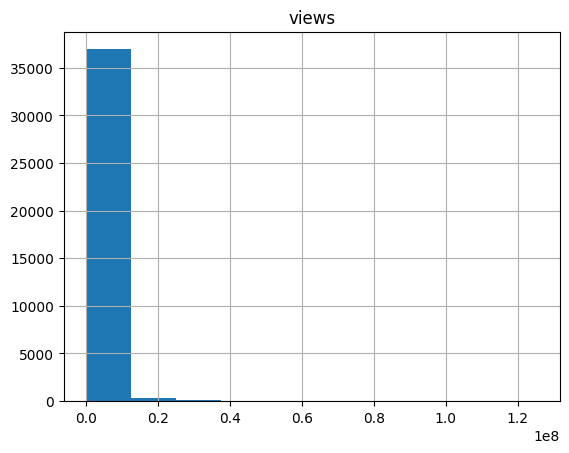

In [12]:
df.hist('views')

In [13]:
#number of videos less than 1mil views
df[df['views']<1e6]['views'].count()/df['views'].count()*100

np.float64(79.56735917755408)

array([[<Axes: title={'center': 'likes'}>]], dtype=object)

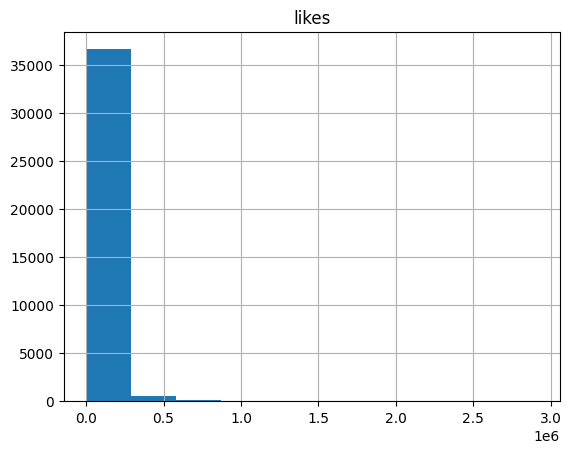

In [14]:
df.hist('likes')

In [15]:
#percentage of videos with >100000 likes

df[df['likes']>100000]['likes'].count()/df['likes'].count()*100

np.float64(5.9327479117584065)

array([[<Axes: title={'center': 'dislikes'}>]], dtype=object)

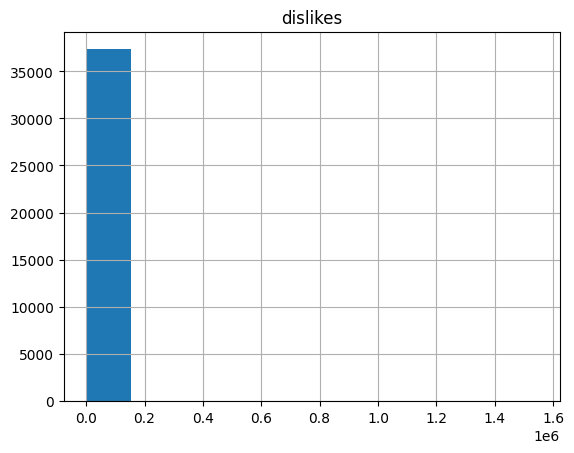

In [16]:
df.hist('dislikes')

In [17]:
#percentage of videos with >100000 likes

df[df['dislikes']<100000]['dislikes'].count()/df['dislikes'].count()*100

np.float64(99.9464553437567)

array([[<Axes: title={'center': 'comment_count'}>]], dtype=object)

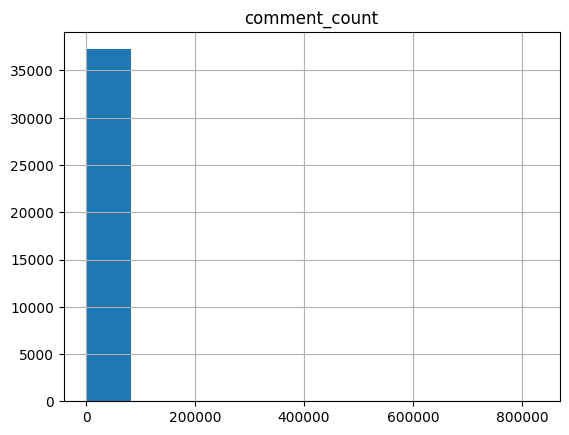

In [18]:
df.hist('comment_count')

In [19]:
#percentage of videos with >5k comment_count

df[df['comment_count']<100000]['comment_count'].count()/df['comment_count'].count()*100

np.float64(99.7911758406511)

In [20]:
#description of non numerical columns

df.describe(include = 'O')

,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description
count,37352,37352,37352,37352,37352,37352,37352,37352
unique,16307,205,16721,1426,16339,12578,16523,13993
top,#NAME?,17.14.11,Mission: Impossible - Fallout (2018) - Officia...,VikatanTV,2018-04-21T13:30:01.000Z,[none],https://i.ytimg.com/vi/rRr1qiJRsXk/default.jpg,
freq,511,200,19,284,18,1381,16,561


In [21]:
df['title_length'] = df['title'].apply(lambda x : len(x))

In [22]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'title_length'],
      dtype='object')

In [23]:
df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,title_length
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,81
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",58
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,58
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...,30
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,88


<Axes: >

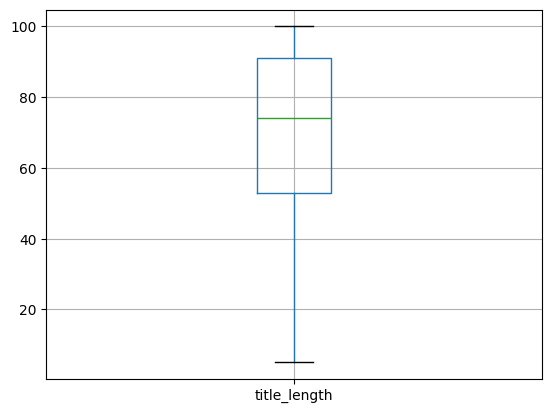

In [24]:
df.boxplot('title_length')

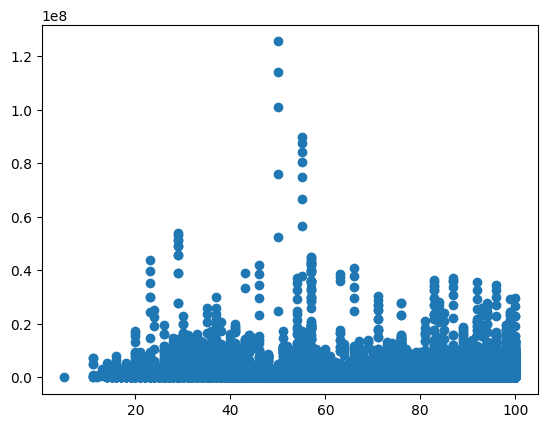

In [25]:
#is there any relation between title Lengths and the no. of views

plt.scatter(df['title_length'],df['views'])

In [26]:
print(df.dtypes)

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
title_length               int64
dtype: object


In [27]:
print(df.select_dtypes(exclude=['number']))

          video_id trending_date  \
0      kzwfHumJyYc      17.14.11   
1      zUZ1z7FwLc8      17.14.11   
2      10L1hZ9qa58      17.14.11   
3      N1vE8iiEg64      17.14.11   
4      kJzGH0PVQHQ      17.14.11   
...            ...           ...   
37347  iNHecA3PJCo      18.14.06   
37348  dpPmPbhcslM      18.14.06   
37349  mV6aztP58f8      18.14.06   
37350  qxqDNP1bDEw      18.14.06   
37351  wERgpPK44w0      18.14.06   

                                                   title       channel_title  \
0      Sharry Mann: Cute Munda ( Song Teaser) | Parmi...     Lokdhun Punjabi   
1      पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...             HJ NEWS   
2      Stylish Star Allu Arjun @ ChaySam Wedding Rece...                TFPC   
3                         Eruma Saani | Tamil vs English         Eruma Saani   
4      why Samantha became EMOTIONAL @ Samantha naga ...          Filmylooks   
...                                                  ...                 ...   
37347  

In [28]:
df.corr(numeric_only=True)

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,title_length
category_id,1.000000,-0.183215,-0.127600,-0.042450,-0.036223,0.038928,0.057953,-0.053865,-0.162416
views,-0.183215,1.000000,0.850096,0.543294,0.674195,-0.034227,-0.034364,0.004976,-0.050850
likes,-0.127600,0.850096,1.000000,0.494560,0.780514,-0.045624,-0.040741,0.028464,-0.168641
dislikes,-0.042450,0.543294,0.494560,1.000000,0.708125,-0.011821,-0.015136,0.002985,-0.029929
comment_count,-0.036223,0.674195,0.780514,0.708125,1.000000,-0.032860,-0.024210,0.015771,-0.117920
comments_disabled,0.038928,-0.034227,-0.045624,-0.011821,-0.032860,1.000000,0.354718,-0.003132,0.088516
ratings_disabled,0.057953,-0.034364,-0.040741,-0.015136,-0.024210,0.354718,1.000000,-0.002508,0.052120
video_error_or_removed,-0.053865,0.004976,0.028464,0.002985,0.015771,-0.003132,-0.002508,1.000000,-0.032605
title_length,-0.162416,-0.050850,-0.168641,-0.029929,-0.117920,0.088516,0.052120,-0.032605,1.000000


In [29]:
#grouping of data based on category ID
df.groupby('category_id').sum()

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,title_length
category_id,,,,,,,,,,,,,,,,
1,kzwfHumJyYcePO5M5DE01IMF9ovM9y0PExjFKfAudCOotz...,17.14.1117.14.1117.14.1117.14.1117.14.1117.14....,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun PunjabiYRFDREAMS N BEYONDDream Warrior...,2017-11-12T12:20:39.000Z2017-11-07T06:01:50.00...,"sharry mann|""sharry mann new song""|""sharry man...",3847149504,69241553,4315081,5789446,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg...,71,11,11,Presenting Sharry Mann latest Punjabi Song Cu...,120611
2,NDuOXWe4KW8Ik9JXtQDqmUNDuOXWe4KW8Ik9JXtQDqmUND...,17.14.1117.15.1117.15.1117.16.1117.16.1117.18....,உலக அழிவை முன்பே தெரிந்து கொள்ளும் 5 மர்ம அறிக...,Kollywood TalkModi again in 2019Kollywood Talk...,2017-11-13T07:12:19.000Z2017-11-13T20:30:00.00...,"5 amazing signs world end|""amazing facts about...",30384725,539571,22284,86488,https://i.ytimg.com/vi/NDuOXWe4KW8/default.jpg...,9,2,0,உலக அழிவை முன்பே தெரிந்து கொள்ளும் 5 அறிகுறிகள...,5304
10,7MxiQ4v0EnEc64I9HNpiOYzOOmEDwPJX0so0ccfs-psI01...,17.14.1117.14.1117.14.1117.14.1117.14.1117.14....,Daang ( Full Video ) | Mankirt Aulakh | Sukh S...,Speed RecordsT-SeriesWhite Hill MusicVS RECORD...,2017-11-11T16:41:15.000Z2017-11-11T06:14:19.00...,"punjabi songs|""punjabi bhangra""|""punjabi music...",10150844485,254328536,15030992,17595070,https://i.ytimg.com/vi/7MxiQ4v0EnE/default.jpg...,7,8,0,Song - Daang\nSinger - Mankirt Aulakh\nFaceboo...,328268
15,XlCHEONTqncXlCHEONTqnc#NAME?,17.18.1117.19.1118.24.03,WE ARE ALL GOING TO D1E.WE ARE ALL GOING TO D1...,PewDiePiePewDiePieKaumudy,2017-11-16T17:53:31.000Z2017-11-16T17:53:31.00...,"[none][none]Snake|""Vavasuresh""|""vavasureshvide...",4879743,362534,6488,42056,https://i.ytimg.com/vi/XlCHEONTqnc/default.jpg...,0,0,0,Join my giveaway for a BEAST Origin computer! ...,147
17,efpUCPITNmwysik6z44B1EPnYrL1rK-z8ysik6z44B1EEx...,17.14.1117.15.1117.15.1117.16.1117.16.1117.17....,Russia Vs Argentina 0-1 - All Goals & Highligh...,NugoBasilaiaaWWETv9 GujaratiWWEGOLAZO TVKabadd...,2017-11-11T14:55:25.000Z2017-11-14T02:34:14.00...,Russia Vs Argentina 0-1 - All Goals & Highligh...,1379949159,32969986,1316379,2717679,https://i.ytimg.com/vi/efpUCPITNmw/default.jpg...,8,10,0,Russia Vs Argentina 0-1 - All Goals & Highligh...,51521
19,0SMKG3SRGzQ0SMKG3SRGzQ0SMKG3SRGzQh4DDlNQyt24h4...,17.14.1117.15.1117.16.1117.02.1217.03.1218.30....,Rana hungama at #ChaySam Wedding Reception || ...,TV9 TeluguTV9 TeluguTV9 TeluguUseful Tamil cha...,2017-11-12T16:08:13.000Z2017-11-12T16:08:13.00...,Rana hungama at #ChaySam Wedding Reception || ...,1374342,16939,616,2448,https://i.ytimg.com/vi/0SMKG3SRGzQ/default.jpg...,0,0,0,Rana hungama at #ChaySam Wedding Reception || ...,545
20,jfrGsxoQJncjRT74op6xakjRT74op6xakjRT74op6xakjR...,17.07.1217.09.1217.10.1217.11.1217.12.1217.18....,Clash Royale: World Finals 2018 Reveal!Clash R...,Clash RoyaleClash RoyaleClash RoyaleClash Roya...,2017-12-05T13:43:12.000Z2017-12-08T15:14:54.00...,"Clash Royale|""Clash Royale Game""|""Supercell""|""...",274722506,6707728,341616,623839,https://i.ytimg.com/vi/jfrGsxoQJnc/default.jpg...,0,0,0,Subscribe! http://supr.cl/SubRoyale\n\n\nEnter...,2934
22,7gShaSuK_PYMqfh8_Uk1eMMXH7yFFl3fETuOBfQRXwhQXj...,17.14.1117.14.1117.14.1117.14.1117.14.1117.14....,ஜெயலலிதாவின் உயில் சிக்கியது அப்பல்லோ சி.டி.ய...,Next GenETV JabardasthAstroMitramBrijnaari Sum...,2017-11-13T06:52:47.000Z2017-11-10T20:38:52.00...,"nextgen|""sasikala""|""sasikala natarajan""|""aiadm...",1364104242,23194729,1728388,2661920,https://i.ytimg.com/vi/7gShaSuK_PY/default.jpg...,163,107,0,ஜெயலலிதாவின் உயில் சிக்கியது \nஅப்பல்லோ சி.டி....,182898
23,N1vE8iiEg64ep3SLMuRbvgCLl1RbxDRAsYvp9jUJtMuY3d...,17.14.1117.14.1117.14.1117.14.1117.14.1117.14....,Eruma Saani | Tamil vs EnglishTYPES OF STUDENT...,Eruma SaaniElvish yadavTroubleSeekerTeamETV Pl...,2017-11-12T07:08:48.000Z2017-11-13

<BarContainer object of 37352 artists>

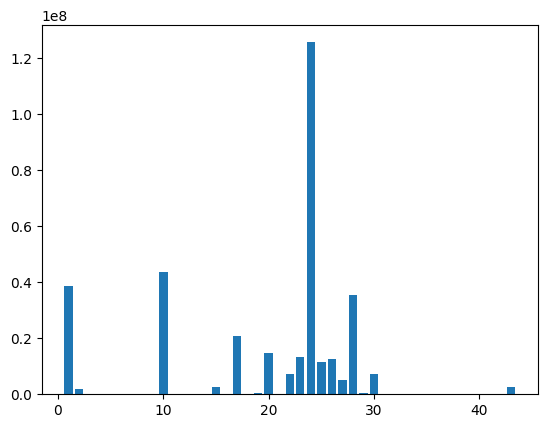

In [30]:
#which category has highest views

plt.bar(df['category_id'], df['views'])

<BarContainer object of 37352 artists>

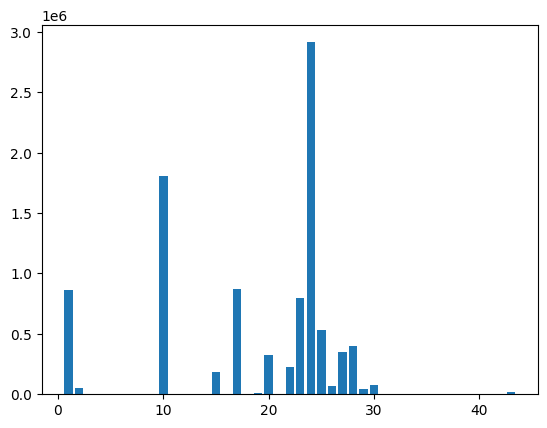

In [31]:
#which category has highest likes

plt.bar(df['category_id'], df['likes'])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37352 entries, 0 to 37351
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                37352 non-null  object
 1   trending_date           37352 non-null  object
 2   title                   37352 non-null  object
 3   channel_title           37352 non-null  object
 4   category_id             37352 non-null  int64 
 5   publish_time            37352 non-null  object
 6   tags                    37352 non-null  object
 7   views                   37352 non-null  int64 
 8   likes                   37352 non-null  int64 
 9   dislikes                37352 non-null  int64 
 10  comment_count           37352 non-null  int64 
 11  thumbnail_link          37352 non-null  object
 12  comments_disabled       37352 non-null  bool  
 13  ratings_disabled        37352 non-null  bool  
 14  video_error_or_removed  37352 non-null  bool  
 15  de

In [33]:
#how many videos got removed or had some error
df['video_error_or_removed'].value_counts()

video_error_or_removed
False    37341
True        11
Name: count, dtype: int64

In [34]:
#percentage of videos that have comments disabled
df['comments_disabled'].value_counts(normalize = True)

comments_disabled
False    0.967766
True     0.032234
Name: proportion, dtype: float64

In [35]:
#percentage of videos that have comments disabled
df['ratings_disabled'].value_counts(normalize = True)

ratings_disabled
False    0.979091
True     0.020909
Name: proportion, dtype: float64

In [37]:
#how many videos have both comments and rating disabled

count = df[(df['comments_disabled'] == True) & (df['ratings_disabled'] == True)].shape[0]
print(count)

360
